# Downloading MNIST Data

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
mnist.data.iloc[0]

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 0, Length: 784, dtype: float64

# Messing with MNIST

In [3]:
X, y = mnist['data'], mnist['target']
print(f'X shape: {X.shape}\ty shape: {y.shape}')

X shape: (70000, 784)	y shape: (70000,)


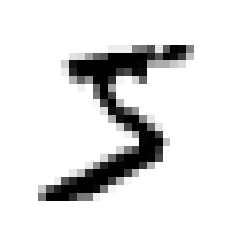

5

In [4]:
# to visualise what are all these numbers we do this
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# converting labels from character to integer
y = y.astype(np.uint8)
y.iloc[0]

sample_digit = np.array(X.iloc[0])
sample_digit_image = sample_digit.reshape(28, 28)
sample_digit_label = y.iloc[0]

plt.imshow(sample_digit_image, cmap=mpl.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()
sample_digit_label

In [5]:
# splitting the data (Mnist data is already shuffled so we don't need to shuffle it again.)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Training a Binary Classifier

Let’s simplify the problem for now and only try to identify one digit—for example,
the number 5. This “5-detector” will be an example of a binary classifier, capable of
distinguishing between just two classes, 5 and not-5.

In [6]:
y_train5 = (y_train == 5)
y_test5 = (y_test == 5)
y_train5[:5]

0     True
1    False
2    False
3    False
4    False
Name: class, dtype: bool

In [16]:
# First lets try Stochastic Gradient Descent Classifier (SGD)
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(random_state=42, shuffle=True)
sgd.fit(X_train, y_train5)

SGDClassifier(random_state=42)

In [17]:
print(f'Prediction: {sgd.predict([sample_digit])}\tActual: {sample_digit_label==5} ')

Prediction: [ True]	Actual: True 


In [23]:
X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# Performance Measures
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone


skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

for train_index, test_index in skfolds.split(X_train, y_train5):
    X_train_folds = X_train.iloc[train_index]
    y_train_folds = y_train5.iloc[train_index]
    X_test_folds = X_train.iloc[test_index]
    y_test_folds = y_train5.iloc[test_index]
    
    clone_clf = clone(sgd)
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_folds)
    n_correct = sum(y_pred == y_test_folds)
    print(f'Correct: {n_correct}, Accuracy: {n_correct/len(y_pred)} ')

Correct: 19338, Accuracy: 0.9669 
Correct: 18325, Accuracy: 0.91625 
Correct: 19357, Accuracy: 0.96785 


In [26]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd, X_train, y_train5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

* Is this accuracy good?
* Lets say we have a classifier which says "not five" for every single input.
* How much accuracy we ll get, lets see.


In [27]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [28]:
never5_clf = Never5Classifier()
cross_val_score(never5_clf, X_train, y_train5, cv=3, scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

We get so high accuracy because there are only 10% 5s in the data. Even we say everything is "not five" we got super high accuracy. That's why accuracy is not a good measurement technique for most of the time.

## Confusion Matrix

Confusion matrices includes much more valueable information than just accuracy.

In [34]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd, X_train, y_train5, cv=3)

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [39]:
from sklearn.metrics import precision_score, recall_score

print(f'Precision: {precision_score(y_train5, y_train_pred)}\n\
Recall: {recall_score(y_train5, y_train_pred)}')

Precision: 0.8370879772350012
Recall: 0.6511713705958311


It is often convenient to combine precision and recall into a single metric called the F1
score, in particular if you need a simple way to compare two classifiers. The F1
score is the harmonic mean of precision and recall. Whereas the regular mean
treats all values equally, the harmonic mean gives much more weight to low values.
As a result, the classifier will only get a high F1 score if both recall and precision are
high.\
\
![F1 Score (Harmonic Mean)](etc/F1Score.jpg)

In [42]:
from sklearn.metrics import f1_score
f1_score(y_train5, y_train_pred)

0.7325171197343846